## **PRE-PROCESSING DATA**

In [ ]:
import numpy as np
import pandas as pd
import re
import string
from itertools import combinations, permutations
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import ast

In [ ]:
def clean(text) :
  text = text.lower() #Lowercase text
  text = re.sub(r'\d+','',text.lower()) #Clean Number
  text = text.translate(str.maketrans("","",string.punctuation)) #Clear Punctuation !@#$&*(%)
  text = text.strip() #Clear Whitespace
  return text

In [ ]:
df = pd.read_csv("zbMATH-complete(1).csv")
new_dataset = df[0:100]
print(new_dataset)

    Unnamed: 0  ...    year
0            0  ...  1994.0
1            1  ...  1994.0
2            2  ...  1994.0
3            3  ...  1994.0
4            4  ...  1994.0
..         ...  ...     ...
95         106  ...  1972.0
96         107  ...  1971.0
97         108  ...  1973.0
98         111  ...  1975.0
99         113  ...  1977.0

[100 rows x 8 columns]


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   author_id   100 non-null    int64  
 2   co_author   100 non-null    object 
 3   name        100 non-null    object 
 4   paper_id    100 non-null    object 
 5   title       100 non-null    object 
 6   venue       100 non-null    object 
 7   year        100 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [ ]:
author_name = new_dataset['name']
print(author_name)

0               a.n. abd-alla
1            lokenath debnath
2     abo-el-nour n. abd-alla
3     abo-el-nour n. abd-alla
4            lokenath debnath
               ...           
95              d.n. akhiezer
96              d.n. akhiezer
97              d.n. akhiezer
98              d.n. akhiezer
99              d.n. akhiezer
Name: name, Length: 100, dtype: object


In [ ]:
authorname = author_name.apply(clean)
authorname

0              an abdalla
1        lokenath debnath
2     aboelnour n abdalla
3     aboelnour n abdalla
4        lokenath debnath
             ...         
95            dn akhiezer
96            dn akhiezer
97            dn akhiezer
98            dn akhiezer
99            dn akhiezer
Name: name, Length: 100, dtype: object

In [ ]:
hasil_kombinasi_author = combinations(list(authorname), 2)
hasil_kombinasi_author = list(hasil_kombinasi_author)
hasil_kombinasi_author

[('an abdalla', 'lokenath debnath'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'lokenath debnath'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'lokenath debnath'),
 ('an abdalla', 'aboelnour abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'aboelnour n abdalla'),
 ('an abdalla', 'john aczel'),
 ('an abdalla', 'john aczel'),
 ('an abdalla', 'john aczel'),
 ('an abdalla', 'john aczel'),
 ('an abdalla', 'john aczel'),
 ('an abdalla', 'john aczel'),
 ('an abdalla', 'l fuchs'),
 ('an abdalla', 'j pfanzagl'),
 ('an abdalla', 'j pfanzagl'),
 ('an abdalla', 'am ostrowski'),
 ('an abdalla', 'walter benz'),
 ('an abdalla', 'ef beckenbach'),
 ('an abdalla', 's haruki'),
 ('an abdalla', 'c alsina'),
 ('an abdalla', 'claudi alsina'),
 ('an abdalla', 'l loson

In [ ]:
def cosine_sim_vectors(vec1, vec2):
  vec1 = vec1.reshape(1, -1)
  vec2 = vec2.reshape(1, -1)

  return cosine_similarity(vec1, vec2)[0][0]

In [ ]:
author_distance = []
for temp in hasil_kombinasi_author:
    vectorizer = CountVectorizer().fit_transform(temp)
    vectors = vectorizer.toarray()
    #csim = cosine_similarity(vectors)
    c_author = cosine_sim_vectors(vectors[0], vectors[1])
    author_distance.append(c_author)
    print("Jarak {} dan {} adalah {}".format(temp[0], temp[1], c_author))

Jarak an abdalla dan lokenath debnath adalah 0.0
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan lokenath debnath adalah 0.0
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan lokenath debnath adalah 0.0
Jarak an abdalla dan aboelnour abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abda

In [ ]:
attribute1 = pd.DataFrame(list(author_distance), columns=['Author Name'])

In [ ]:
attribute1

,Author Name
0,0.0
1,0.5
2,0.5
3,0.0
4,0.5
...,...
4945,1.0
4946,1.0
4947,1.0
4948,1.0


In [ ]:
tahun = new_dataset['year'].values.reshape(-1,1)
tahun

array([[1994.],
       [1994.],
       [1994.],
       [1994.],
       [1994.],
       [1995.],
       [1995.],
       [1997.],
       [1993.],
       [1997.],
       [1999.],
       [1997.],
       [1999.],
       [1998.],
       [1947.],
       [1947.],
       [1948.],
       [1948.],
       [1949.],
       [1950.],
       [1950.],
       [1966.],
       [1970.],
       [1973.],
       [1975.],
       [1980.],
       [1981.],
       [1984.],
       [1987.],
       [1987.],
       [1989.],
       [1991.],
       [1991.],
       [1992.],
       [1994.],
       [1996.],
       [1997.],
       [1996.],
       [1996.],
       [1994.],
       [1996.],
       [1997.],
       [1999.],
       [1958.],
       [1959.],
       [1963.],
       [1964.],
       [1966.],
       [1968.],
       [1961.],
       [1961.],
       [1971.],
       [1971.],
       [1973.],
       [1977.],
       [1978.],
       [1979.],
       [1979.],
       [1979.],
       [1979.],
       [1980.],
       [1980.],
       [

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mmscaler = MinMaxScaler()
tahun = mmscaler.fit_transform(tahun)
tahun

array([[0.90384615],
       [0.90384615],
       [0.90384615],
       [0.90384615],
       [0.90384615],
       [0.92307692],
       [0.92307692],
       [0.96153846],
       [0.88461538],
       [0.96153846],
       [1.        ],
       [0.96153846],
       [1.        ],
       [0.98076923],
       [0.        ],
       [0.        ],
       [0.01923077],
       [0.01923077],
       [0.03846154],
       [0.05769231],
       [0.05769231],
       [0.36538462],
       [0.44230769],
       [0.5       ],
       [0.53846154],
       [0.63461538],
       [0.65384615],
       [0.71153846],
       [0.76923077],
       [0.76923077],
       [0.80769231],
       [0.84615385],
       [0.84615385],
       [0.86538462],
       [0.90384615],
       [0.94230769],
       [0.96153846],
       [0.94230769],
       [0.94230769],
       [0.90384615],
       [0.94230769],
       [0.96153846],
       [1.        ],
       [0.21153846],
       [0.23076923],
       [0.30769231],
       [0.32692308],
       [0.365

In [ ]:
hasil_kombinasi_tahun = combinations(list(tahun), 2)
hasil_kombinasi_tahun = list(hasil_kombinasi_tahun)
hasil_kombinasi_tahun

[(array([0.90384615]), array([0.90384615])),
 (array([0.90384615]), array([0.90384615])),
 (array([0.90384615]), array([0.90384615])),
 (array([0.90384615]), array([0.90384615])),
 (array([0.90384615]), array([0.92307692])),
 (array([0.90384615]), array([0.92307692])),
 (array([0.90384615]), array([0.96153846])),
 (array([0.90384615]), array([0.88461538])),
 (array([0.90384615]), array([0.96153846])),
 (array([0.90384615]), array([1.])),
 (array([0.90384615]), array([0.96153846])),
 (array([0.90384615]), array([1.])),
 (array([0.90384615]), array([0.98076923])),
 (array([0.90384615]), array([0.])),
 (array([0.90384615]), array([0.])),
 (array([0.90384615]), array([0.01923077])),
 (array([0.90384615]), array([0.01923077])),
 (array([0.90384615]), array([0.03846154])),
 (array([0.90384615]), array([0.05769231])),
 (array([0.90384615]), array([0.05769231])),
 (array([0.90384615]), array([0.36538462])),
 (array([0.90384615]), array([0.44230769])),
 (array([0.90384615]), array([0.5])),
 (ar

In [ ]:
df_name = pd.DataFrame(hasil_kombinasi_tahun)
year_distance = abs(df_name[0] - df_name[1])
x = year_distance 
x

0                        [0.0]
1                        [0.0]
2                        [0.0]
3                        [0.0]
4       [0.019230769230773603]
                 ...          
4945      [0.0769230769230802]
4946      [0.1153846153846203]
4947      [0.0384615384615401]
4948      [0.0769230769230802]
4949      [0.0384615384615401]
Length: 4950, dtype: object

In [ ]:
attribute2 = pd.DataFrame(list(x), columns=['Year'])
attribute2

,Year
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.019231
...,...
4945,0.076923
4946,0.115385
4947,0.038462
4948,0.076923


In [ ]:
venue = new_dataset['venue']
print(venue)

0                               int j math math sci  no
1                               int j math math sci  no
2                                  appl math comput  no
3                               int j math math sci  no
4                               int j math math sci  no
                            ...                        
95                                         mat sb n ser
96                                         math ussr sb
97                                         math ussr sb
98    math ussr izv    translation from izv akad nau...
99                                        math ussr izv
Name: venue, Length: 100, dtype: object


In [ ]:
venues = venue.apply(clean)

In [ ]:
hasil_kombinasi_venue = combinations(list(venues), 2)
hasil_kombinasi_venue = list(hasil_kombinasi_venue)
hasil_kombinasi_venue

[('int j math math sci  no', 'int j math math sci  no'),
 ('int j math math sci  no', 'appl math comput  no'),
 ('int j math math sci  no', 'int j math math sci  no'),
 ('int j math math sci  no', 'int j math math sci  no'),
 ('int j math math sci  no', 'j math anal appl  no'),
 ('int j math math sci  no', 'j math anal appl  no'),
 ('int j math math sci  no', 'japan j ind appl math  no'),
 ('int j math math sci  no', 'mech res commun  no'),
 ('int j math math sci  no', 'mech res commun  no'),
 ('int j math math sci  no', 'mech res commun  no'),
 ('int j math math sci  no', 'tensor new ser  no'),
 ('int j math math sci  no', 'mech res commun  no'),
 ('int j math math sci  no', 'tensor new ser  no'),
 ('int j math math sci  no', 'norske vid selsk forhdl  no'),
 ('int j math math sci  no', 'norske vid selsk forhdl  no'),
 ('int j math math sci  no', 'norske vid selsk forhdl  no'),
 ('int j math math sci  no', 'am math mon'),
 ('int j math math sci  no', 'norske vid selsk forhdl  no  s'),


In [ ]:
venue_distance = []
for temp in hasil_kombinasi_venue:
    vectorizer = CountVectorizer().fit_transform(temp)
    vectors = vectorizer.toarray()
    #csim = cosine_similarity(vectors)
    c_venue = cosine_sim_vectors(vectors[0], vectors[1])
    venue_distance.append(c_venue)
    print("Jarak {} dan {} adalah {}".format(temp[0], temp[1], c_venue))

Jarak int j math math sci  no dan int j math math sci  no adalah 0.9999999999999998
Jarak int j math math sci  no dan appl math comput  no adalah 0.5669467095138407
Jarak int j math math sci  no dan int j math math sci  no adalah 0.9999999999999998
Jarak int j math math sci  no dan int j math math sci  no adalah 0.9999999999999998
Jarak int j math math sci  no dan j math anal appl  no adalah 0.5669467095138407
Jarak int j math math sci  no dan j math anal appl  no adalah 0.5669467095138407
Jarak int j math math sci  no dan japan j ind appl math  no adalah 0.5070925528371099
Jarak int j math math sci  no dan mech res commun  no adalah 0.1889822365046136
Jarak int j math math sci  no dan mech res commun  no adalah 0.1889822365046136
Jarak int j math math sci  no dan mech res commun  no adalah 0.1889822365046136
Jarak int j math math sci  no dan tensor new ser  no adalah 0.1889822365046136
Jarak int j math math sci  no dan mech res commun  no adalah 0.1889822365046136
Jarak int j math mat

In [ ]:
attribute3 = pd.DataFrame(list(venue_distance), columns=['Venue'])

In [ ]:
title = new_dataset['title']
print(title)

0     torsional vibrations of nonhomogeneous magneto...
1     torsional vibrations of nonhomogeneous magneto...
2     torsional wave propagation in an orthotropic m...
3     corrigendum torsional vibration of nonhomogene...
4     corrigendum torsional vibration of nonhomogene...
                            ...                        
95    on the cohomology of compact complex homogeneo...
96     cohomology of compact complex homogeneous spaces
97    on the cohomology of compact complex homogeneo...
98    compact complex homogeneous spaces with solvab...
99                           dense orbits with two ends
Name: title, Length: 100, dtype: object


In [ ]:
titles = title.apply(clean)

In [ ]:
hasil_kombinasi_title = combinations(list(titles), 2)
hasil_kombinasi_title = list(hasil_kombinasi_title)
hasil_kombinasi_title

[('torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder',
  'torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder'),
 ('torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder',
  'torsional wave propagation in an orthotropic magneto elastic hollow circular cylinder'),
 ('torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder',
  'corrigendum torsional vibration of nonhomogeneous magnetostrictive elastic circular cylinder'),
 ('torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder',
  'corrigendum torsional vibration of nonhomogeneous magnetostrictive elastic circular cylinder'),
 ('torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder',
  'nonlinear waves in thermo magnetostrictive elastic materials'),
 ('torsional vibrations of nonhomogeneous magnetostrictive elastic circular cylinder',
  'nonlinear waves in thermo magn

In [ ]:
title_distance = []
for temp in hasil_kombinasi_author:
    vectorizer = CountVectorizer().fit_transform(temp)
    vectors = vectorizer.toarray()
    #csim = cosine_similarity(vectors)
    c_title = cosine_sim_vectors(vectors[0], vectors[1])
    title_distance.append(c_title)
    print("Jarak {} dan {} adalah {}".format(temp[0], temp[1], c_title))

Jarak an abdalla dan lokenath debnath adalah 0.0
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan lokenath debnath adalah 0.0
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan lokenath debnath adalah 0.0
Jarak an abdalla dan aboelnour abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan aboelnour n abdalla adalah 0.4999999999999999
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abdalla dan john aczel adalah 0.0
Jarak an abda

In [ ]:
attribute4 = pd.DataFrame(list(title_distance), columns=['Title'])

In [ ]:
attribute4

,Title
0,0.0
1,0.5
2,0.5
3,0.0
4,0.5
...,...
4945,1.0
4946,1.0
4947,1.0
4948,1.0


In [ ]:
coauthor = new_dataset['co_author']
print(coauthor)

0               ['a.n. abd-alla', 'lokenath debnath']
1               ['a.n. abd-alla', 'lokenath debnath']
2                         ['abo-el-nour n. abd-alla']
3     ['abo-el-nour n. abd-alla', 'lokenath debnath']
4     ['abo-el-nour n. abd-alla', 'lokenath debnath']
                           ...                       
95                                  ['d.n. akhiezer']
96                                  ['d.n. akhiezer']
97                                  ['d.n. akhiezer']
98                                  ['d.n. akhiezer']
99                                  ['d.n. akhiezer']
Name: co_author, Length: 100, dtype: object


In [ ]:
authorname = author_name.apply(clean)

In [ ]:
hasil_kombinasi_coauthor = combinations(list(coauthor), 2)
hasil_kombinasi_coauthor = list(hasil_kombinasi_coauthor)
hasil_kombinasi_coauthor

[("['a.n. abd-alla', 'lokenath debnath']",
  "['a.n. abd-alla', 'lokenath debnath']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour n. abd-alla']"),
 ("['a.n. abd-alla', 'lokenath debnath']",
  "['abo-el-nour n. abd-alla', 'lokenath debnath']"),
 ("['a.n. abd-alla', 'lokenath debnath']",
  "['abo-el-nour n. abd-alla', 'lokenath debnath']"),
 ("['a.n. abd-alla', 'lokenath debnath']",
  "['abo-el-nour n. abd-alla', 'lokenath debnath']"),
 ("['a.n. abd-alla', 'lokenath debnath']",
  "['abo-el-nour n. abd-alla', 'lokenath debnath']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour abd-alla']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour n. abd-alla']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour n. abd-alla']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour n. abd-alla']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour n. abd-alla']"),
 ("['a.n. abd-alla', 'lokenath debnath']", "['abo-el-nour n. abd-alla']"),
 ("

In [ ]:
cathr_distance = []
for temp in hasil_kombinasi_coauthor:
    vectorizer = CountVectorizer().fit_transform(temp)
    vectors = vectorizer.toarray()
    #csim = cosine_similarity(vectors)
    c_cathr = cosine_sim_vectors(vectors[0], vectors[1])
    cathr_distance.append(c_cathr)
    print("Jarak {} dan {} adalah {}".format(temp[0], temp[1], c_cathr))

Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['a.n. abd-alla', 'lokenath debnath'] adalah 1.0
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla'] adalah 0.4472135954999579
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla', 'lokenath debnath'] adalah 0.7559289460184544
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla', 'lokenath debnath'] adalah 0.7559289460184544
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla', 'lokenath debnath'] adalah 0.7559289460184544
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla', 'lokenath debnath'] adalah 0.7559289460184544
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour abd-alla'] adalah 0.4472135954999579
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla'] adalah 0.4472135954999579
Jarak ['a.n. abd-alla', 'lokenath debnath'] dan ['abo-el-nour n. abd-alla'] adalah 0.4472135954999579
Jarak ['a.

In [ ]:
attribute5 = pd.DataFrame(list(cathr_distance), columns=['Co Author'])

In [ ]:
attribute5

,Co Author
0,1.000000
1,0.447214
2,0.755929
3,0.755929
4,0.755929
...,...
4945,1.000000
4946,1.000000
4947,1.000000
4948,1.000000


In [ ]:
label = new_dataset['author_id']
print(label)

0       0
1     412
2       0
3       0
4     412
     ... 
95     26
96     26
97     26
98     26
99     26
Name: author_id, Length: 100, dtype: int64


In [ ]:
hasil_kombinasi_label = combinations(list(label), 2)
hasil_kombinasi_label = list(hasil_kombinasi_label)
hasil_kombinasi_label

[(0, 412),
 (0, 0),
 (0, 0),
 (0, 412),
 (0, 0),
 (0, 412),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 6),
 (0, 6),
 (0, 6),
 (0, 6),
 (0, 6),
 (0, 6),
 (0, 620),
 (0, 1626),
 (0, 1626),
 (0, 1578),
 (0, 143),
 (0, 126),
 (0, 804),
 (0, 46),
 (0, 46),
 (0, 1262),
 (0, 1132),
 (0, 1132),
 (0, 1132),
 (0, 1132),
 (0, 46),
 (0, 1294),
 (0, 1262),
 (0, 1270),
 (0, 1294),
 (0, 682),
 (0, 1294),
 (0, 1294),
 (0, 1294),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 2413),
 (0, 22),
 (0, 2161),
 (0, 22),
 (0, 2161),
 (0, 22),
 (0, 22),
 (0, 2413),
 (0, 22),
 (0, 22),
 (0, 677),
 (0, 825),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 2161),
 (0, 2413),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 2418),
 (0, 22),
 (0, 22),
 (0, 22),
 (0, 1715),
 (0, 1958),
 (0, 22),
 (0, 22),
 (0, 26),
 (0, 26),
 (0, 26)

In [ ]:
labels = []
for temp in hasil_kombinasi_label:
    label_1 = temp[0]
    label_2 = temp[1]
    if label_1 == label_2:
        labels.append(1)
    else:
        labels.append(0)

In [ ]:
labels

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
labels = np.array(labels)

In [ ]:
attribute6 = pd.DataFrame(list(labels), columns=['Labels'])

In [ ]:
result = pd.concat([attribute1, attribute2, attribute3, attribute4, attribute5, attribute6], axis=1)

In [ ]:
result.to_csv (r'cosinesimilaritydata.csv', index = False, header=True)

In [ ]:
result

,Author Name,Year,Venue,Title,Co Author,Labels
0,0.0,0.000000,1.000000,0.0,1.000000,0
1,0.5,0.000000,0.566947,0.5,0.447214,1
2,0.5,0.000000,1.000000,0.5,0.755929,1
3,0.0,0.000000,1.000000,0.0,0.755929,0
4,0.5,0.019231,0.566947,0.5,0.755929,1
...,...,...,...,...,...,...
4945,1.0,0.076923,0.320256,1.0,1.000000,1
4946,1.0,0.115385,0.666667,1.0,1.000000,1
4947,1.0,0.038462,0.320256,1.0,1.000000,1
4948,1.0,0.076923,0.666667,1.0,1.000000,1


## **CLASIFICATION DATA WITH NN**

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from keras.utils import to_categorical
import sklearn as sk
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
import random

In [ ]:
same_author = result.loc[result['Labels'] == 1]
dif_author = result.loc[result['Labels'] == 0]
print("We have", len(same_author), "same author data points and", len(dif_author), "different author data points.")

We have 895 same author data points and 4055 different author data points.


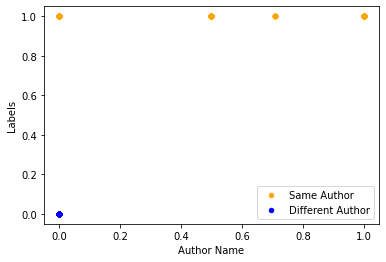

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the author data to see the ranges of author name.


In [ ]:
ax = same_author.plot.scatter(x='Author Name', y='Labels', color='Orange', label='Same Author')
dif_author.plot.scatter(x='Author Name', y='Labels', color='Blue', label='Different Author', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the author data to see the ranges of author name.")

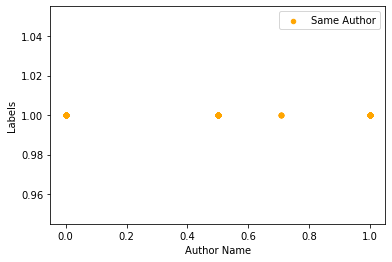

In [ ]:
bx = same_author.plot.scatter(x='Author Name', y='Labels', color='Orange', label='Same Author')
plt.show()

In [ ]:
data = result.values

In [ ]:
feature = data[:,0:5]
labels = data[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.2, random_state = 42, shuffle = True)

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim = 5, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
model.fit(X_train, y_train_cat, epochs = 50)

Epoch 1/50
124/124 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.9396
Epoch 2/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9761
Epoch 3/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9715
Epoch 4/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 0.9747
Epoch 5/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9739
Epoch 6/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9758
Epoch 7/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.9760
Epoch 8/50
124/124 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9778
Epoch 9/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9737
Epoch 10/50
124/124 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9735

In [ ]:
prediksi = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
report = classification_report(y_test, prediksi)

In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       823
         1.0       1.00      0.84      0.92       167

    accuracy                           0.97       990
   macro avg       0.98      0.92      0.95       990
weighted avg       0.97      0.97      0.97       990



In [ ]:
cm = confusion_matrix(y_test, prediksi)

In [ ]:
print(cm)

[[823   0]
 [ 26 141]]


## **CLUSTERING DATA WITH DBSCAN**

In [ ]:
cosinedata = result.values
X = cosinedata[:,0:5]
labels_true = cosinedata[:,-1]
X = StandardScaler().fit_transform(X)
X

array([[-0.41497463, -1.21311335,  4.13773751, -0.41497463,  2.42618944],
       [ 1.08294988, -1.21311335,  2.07217764,  1.08294988,  0.78873336],
       [ 1.08294988, -1.21311335,  4.13773751,  1.08294988,  1.70320561],
       ...,
       [ 2.5808744 , -1.0558385 ,  0.89552385,  2.5808744 ,  2.42618944],
       [ 2.5808744 , -0.89856365,  2.54781781,  2.5808744 ,  2.42618944],
       [ 2.5808744 , -1.0558385 ,  2.42306928,  2.5808744 ,  2.42618944]])

In [ ]:
db = DBSCAN(eps=1.5, min_samples=150).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 2
Estimated number of noise points: 284
Homogeneity: 0.692
Completeness: 0.591
V-measure: 0.638
Adjusted Rand Index: 0.808
Adjusted Mutual Information: 0.637
Silhouette Coefficient: 0.591


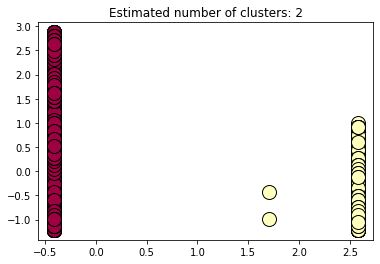

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    #xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             #markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()